In [43]:
import math
import numpy as np
import scipy.stats
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# this will make plots a little bit prettier
sns.set(style='darkgrid')
sns.set_context('talk')

# TOOLS OF PARAMETER ESTIMATION: THE PDF, CDF AND QUANTILE FUNCTION

In [3]:
# Estimating the Conversion Rate for Email Signup List
a = 300
b = 39700

In [4]:
r = beta.rvs(a, b, size=1000)

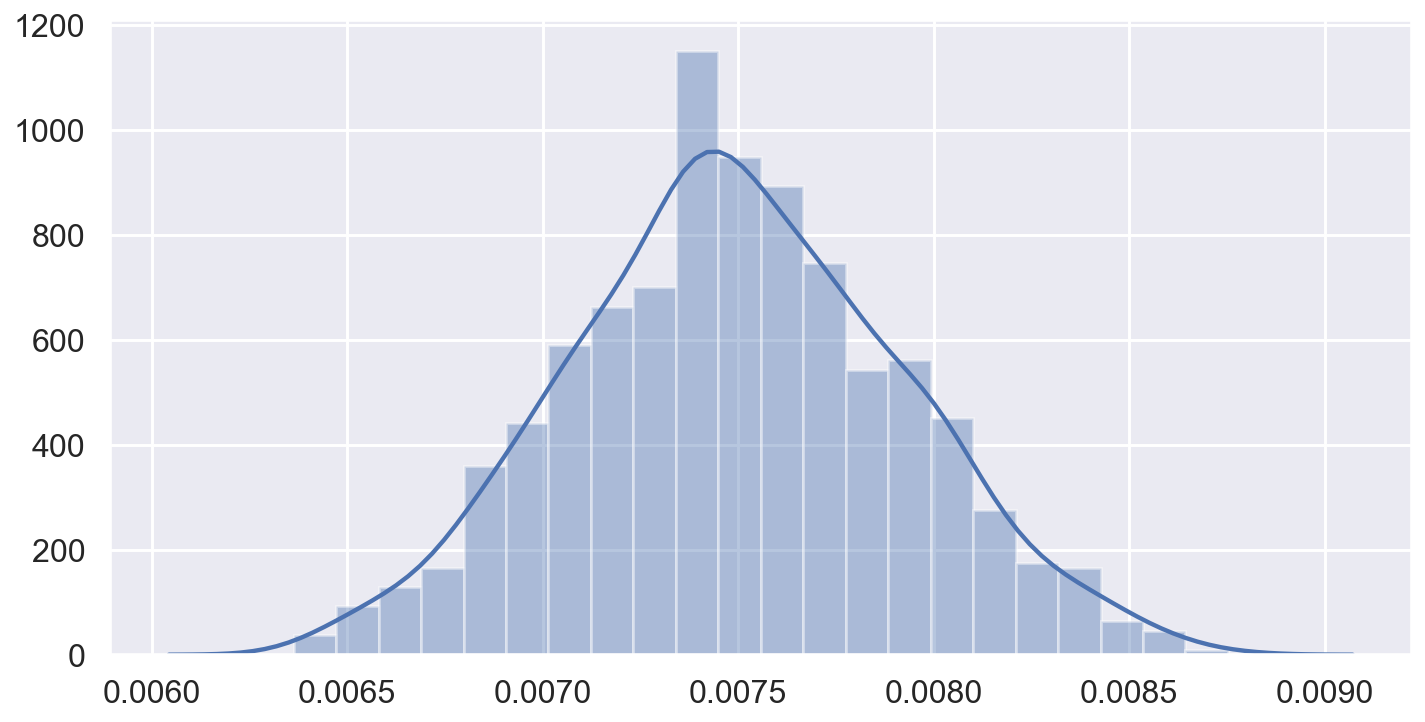

In [11]:
# few style changes to make plot prettier
plt.figure(figsize=(12,6), dpi=140)
sns.distplot(r)

The probability of the actual rate being lower than 0.0065

In [16]:
x = [0, 0.0065]
lowb= beta.sf(x, a, b)[0] - beta.sf(x, a, b)[1] 
lowb

0.007978686170177607

The probability of conversion rate being higher than expected (0.0085 or higher)

In [17]:
x = [0.0085, 1]
highb = beta.sf(x, a, b)[0] - beta.sf(x, a, b)[1] 
highb

0.01248151030012834

In [18]:
ratio = highb/lowb
ratio

1.5643565912870714

Code shown in the book as "Using the CDF in R"

In [20]:
beta.cdf(0.0065, 300, 39700)

0.00797868617017764

In [21]:
beta.cdf(1, 300, 39700) - beta.cdf(0.0085, 300, 39700)

0.01248151030012834

Calculating Quantiles in <s>R</s> Python :)

In [54]:
beta.ppf(0.999, 300, 39700)

0.008903462119414618

Finding 95% CI 

In [55]:
lower_bound = beta.ppf(0.025, 300, 39700)
upper_bound = beta.ppf(0.975, 300, 39700)

In [56]:
lower_bound

0.0066780740444127165

In [57]:
upper_bound

0.008368562363876286

### 1. Using the code example for plotting the PDF on page 127, plot the CDF and quantile functions.

**CDF BETA (300, 39700)**

In [97]:
X = np.arange(0.005, 0.01, 0.00001)
Y = beta.cdf(X, 300, 39700)

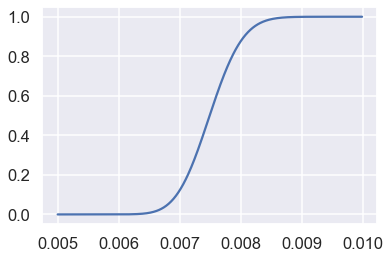

In [100]:
sns.lineplot(X, Y)

**Quantile of Beta (300, 39700)**

In [116]:
X = np.arange(0.001, 0.99, 0.001)
Y = beta.ppf(X, 300, 39700)

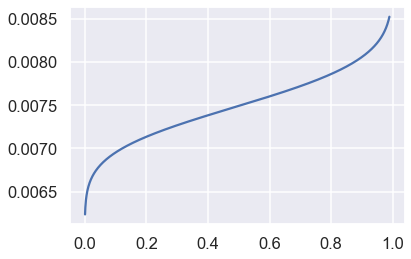

In [117]:
sns.lineplot(X, Y)

### 2. Returning to the task of measuring snowfall from Chapter 10, say you have the following measurements (in inches) of snowfall:
### 7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4
### What is your 99.9 percent confidence interval for the true value of snowfall?

In [131]:
vals = np.array([7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4])
mu = vals.mean()
sigma = vals.std(ddof=1)   # this argument is required to achieve same results as in R, since we are calculating sd for samples
                           # and not for the population - by default ddof is 0 and it is calculating sd for population

In [132]:
lower = norm.ppf(0.0005, loc=mu, scale=sigma)
upper = norm.ppf(0.9995, loc=mu, scale=sigma)

In [133]:
lower

4.456061591417175

In [134]:
upper

11.923938408582863

### 3. A child is going door to door selling candy bars. So far she has visited 30 houses and sold 10 candy bars. She will visit 40 more houses today. What is the 95 percent confidence interval for how many candy bars she will sell the rest of the day? 

In [146]:
a = 10
b = 20

In [149]:
upper = beta.ppf(0.975, a, b)
lower = beta.ppf(0.025, a, b)

In [151]:
lower

0.17938364923511183

In [152]:
upper

0.50832335380999

In [162]:
# extreme values for binomial distribution given that probability of selling a candy bar is 1/3
binom.ppf(0.975, 40, 0.333)

19.0

In [163]:
# extreme values for binomial distribution given that probability of selling a candy bar is 1/3
binom.ppf(0.025, 40, 0.333)

8.0